#**The Sparks Foundation**
## **Prediction using Unsupervised ML**
**By Aagaaz Ali Sayed**

**1. Importing the libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

# Forming the dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Forming the X variable
X = df.iloc[:, [0, 1, 2, 3]].values

# Forming the y matrix
y = iris.target

**2. Exploring the data and checking for null values**

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


0 = Iris-setosa
1 = Iris-versicolor
2 = Iris-virginica


**3. Performing K means clustering**

In [7]:
from sklearn.cluster import KMeans

In [8]:
# A function to get the wcss score for k = 1 to 9
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602]

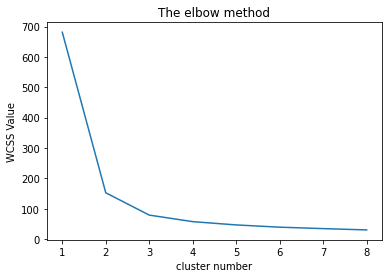

In [9]:
plt.plot(range(1,9), wcss)
plt.xlabel('cluster number')
plt.ylabel('WCSS Value')
plt.title("The elbow method")
plt.show()

The elbow clearly occurs when k or cluster number = 3 so we will choose k = 3 for our model.

In [10]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 0)
y_clusters = kmeans.fit_predict(X)

In [11]:
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**4. Plotting the clusters**

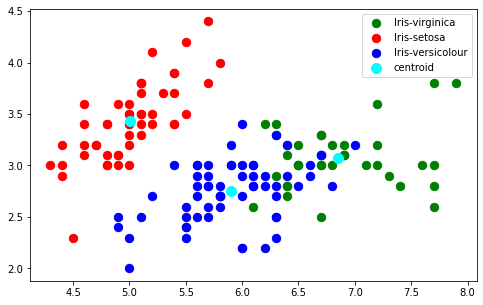

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s = 70, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s = 70, c = 'blue', label = 'Iris-versicolour')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s = 100, c = 'cyan', label = 'centroid')
plt.legend()